In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from mpl_toolkits import mplot3d

In [2]:
def GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
        
    X[:,0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):

        # Making sure that samples from a normal have mean 0 and variance 1

        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma * sigma) * dt + sigma * np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt
        
    # Compute exponent of ABM

    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


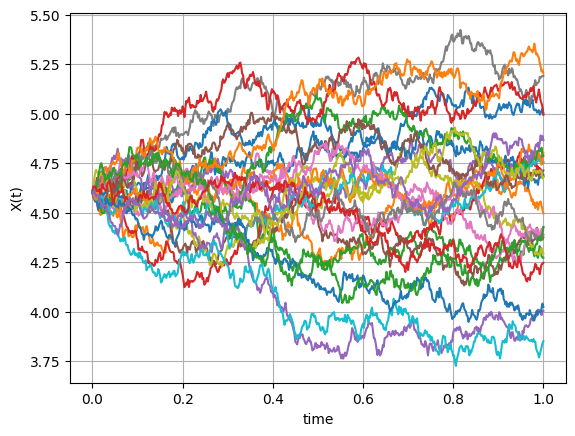

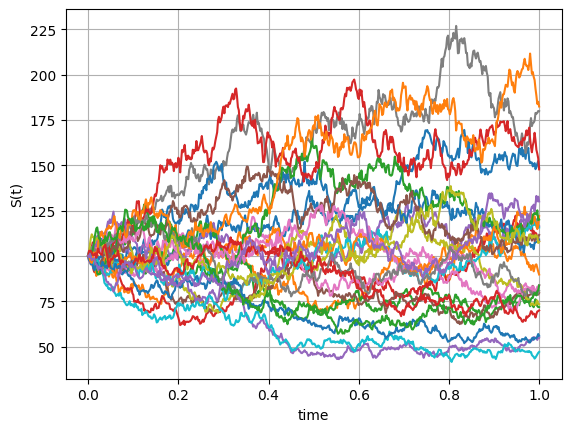

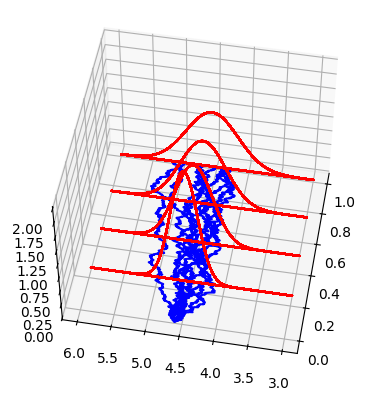

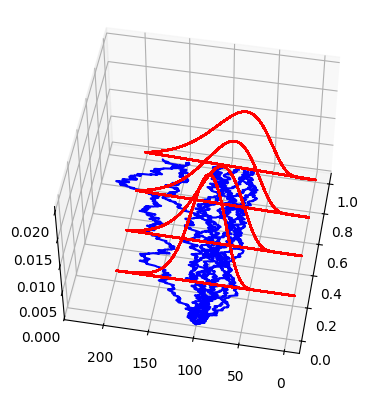

In [3]:




def mainCalculation():
    NoOfPaths = 25
    NoOfSteps = 500
    T = 1
    r = 0.05
    sigma = 0.4
    S_0 = 100
    
    Paths = GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]
    
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    
       
    # 3D graph for X(t) for paths versus density

    plt.figure(3)
    ax = plt.axes(projection='3d')
    zline = np.zeros([len(timeGrid),1])
    
    # Plot paths

    n = 10
    for i in range(0,n,1):
        y1 = np.squeeze(np.transpose(X[i,:]))
        x1 = timeGrid
        z1 = np.squeeze(zline)
        ax.plot3D(x1, y1, z1, 'blue')
        
    ax.view_init(50, -170)
    
    # Plot densities for X(T)

    Ti = np.linspace(0,T,5)
    normPDF = lambda x,t :  st.norm.pdf(x, np.log(S_0) + (r - 0.5 * sigma * sigma)*t, np.sqrt(t) * sigma)
    y1 = np.linspace(3,6,100)
    for ti in Ti:
        x1 = np.zeros([len(y1),1]) + ti
        z1 = normPDF(y1,ti)
        ax.plot3D(x1, y1, z1, 'red')
    
     # 3D graph for S(t) for paths versus density

    plt.figure(4)
    ax = plt.axes(projection='3d')
    zline = np.zeros([len(timeGrid),1])
    
    # Plot paths

    n = 10
    for i in range(0,n,1):
        y1 = np.squeeze(np.transpose(S[i,:]))
        x1 = timeGrid
        z1 = np.squeeze(zline)
        ax.plot3D(x1, y1, z1, 'blue')
        
    ax.view_init(50, -170)
    
    # Plot densities for X(T)

    Ti = np.linspace(0,T,5)

    # Note that in scipy the scale parameter needs to be in the exponent 

    lognnormPDF = lambda x,t :  st.lognorm.pdf(x, scale = np.exp(np.log(S_0) + (r - 0.5 * sigma * sigma)*t), s= np.sqrt(t) * sigma)
    y1 = np.linspace(0,200,100)
    for ti in Ti:
        x1 = np.zeros([len(y1),1]) + ti
        z1 = lognnormPDF(y1,ti)
        ax.plot3D(x1, y1, z1, 'red')
                    
mainCalculation()


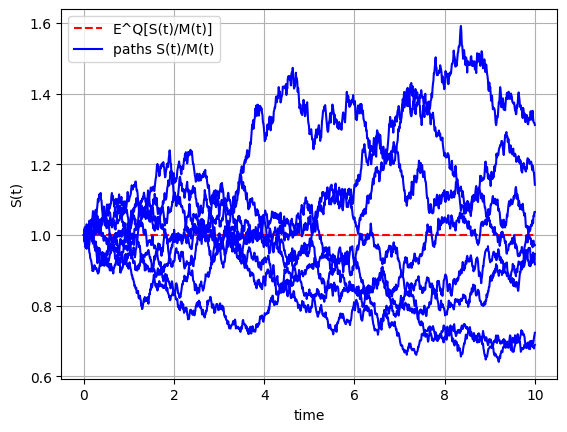

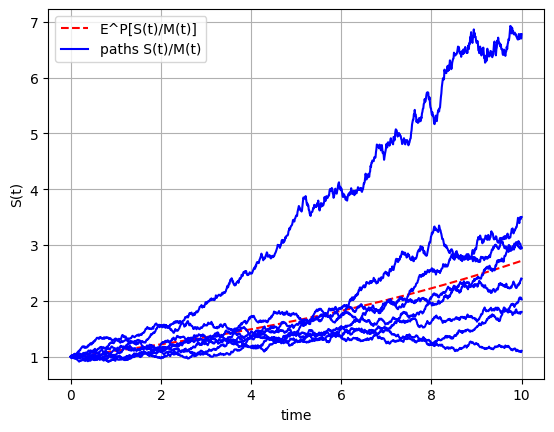

In [4]:
def GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):    
    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
        
    X[:,0] = np.log(S_0)
    
    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):

        # Making sure that samples from a normal have mean 0 and variance 1

        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])
     
        X[:,i+1] = X[:,i] + (r - 0.5 * sigma * sigma) * dt + sigma *\
        np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt
        
    # Compute exponent of ABM

    S = np.exp(X)
    paths = {"time":time,"S":S}
    return paths
    
def MainCode():
    NoOfPaths = 8
    NoOfSteps = 1000
    S_0       = 1
    r         = 0.05
    mu        = 0.15
    sigma     = 0.1
    T         = 10

    # Money-savings account

    M         = lambda t: np.exp(r * t)
    
    # Monte Carlo paths

    pathsQ    = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    S_Q       = pathsQ["S"]
    pathsP = GeneratePathsGBM(NoOfPaths,NoOfSteps,T,mu,sigma,S_0)
    S_P = pathsP["S"]
    time= pathsQ["time"]    
    
    # Discounted stock paths

    S_Qdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    S_Pdisc = np.zeros([NoOfPaths,NoOfSteps+1])
    i = 0
    for i, ti in enumerate(time):
        S_Qdisc[:, i] = S_Q[:,i]/M(ti) 
        S_Pdisc[:, i] = S_P[:,i]/M(ti) 
    
    # S(T)/M(T) with stock growing with rate r

    plt.figure(1)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_Q = lambda t: S_0 * np.exp(r *t) / M(t)
    plt.plot(time,eSM_Q(time),'r--')
    plt.plot(time, np.transpose(S_Qdisc),'blue')   
    plt.legend(['E^Q[S(t)/M(t)]','paths S(t)/M(t)'])
    
    # S(T)/M(T) with stock growing with rate mu

    plt.figure(2)
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")
    eSM_P = lambda t: S_0 * np.exp(mu *t) / M(t)
    plt.plot(time,eSM_P(time),'r--')
    plt.plot(time, np.transpose(S_Pdisc),'blue')   
    plt.legend(['E^P[S(t)/M(t)]','paths S(t)/M(t)'])
    
MainCode()